Import Library

In [644]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [645]:
df = pd.read_csv('/content/train.csv')

In [646]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [647]:
df.shape

(1460, 81)

Data **Preprocessing**

In [648]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [649]:
df['LotFrontage']=df['LotFrontage'].replace(np.nan,df['LotFrontage'].mean())

In [650]:
df.shape

(1460, 81)

In [651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [652]:
df['MasVnrType'].value_counts()

,count
MasVnrType,
BrkFace,445
Stone,128
BrkCmn,15


In [653]:
df['MasVnrType'] = df['MasVnrType'].replace(np.nan ,'BrkFace' )


In [654]:
df['MasVnrType'].value_counts()

,count
MasVnrType,
BrkFace,1317
Stone,128
BrkCmn,15


In [655]:
df = df.drop(columns=['Alley' , 'MiscFeature' , 'PoolQC' , 'Fence'],axis=1)

In [656]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [657]:
df.shape

(1460, 77)

In [658]:
df['FireplaceQu'].value_counts()

,count
FireplaceQu,
Gd,380
TA,313
Fa,33
Ex,24
Po,20


In [659]:
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan,'Gd')

In [660]:
df['FireplaceQu'].value_counts()

,count
FireplaceQu,
Gd,1070
TA,313
Fa,33
Ex,24
Po,20


In [661]:
df=df.dropna()

In [662]:
df.isnull().values.sum()
df.shape

(1338, 77)

In [663]:
cat_data = df.select_dtypes(include='object')
p = cat_data.columns

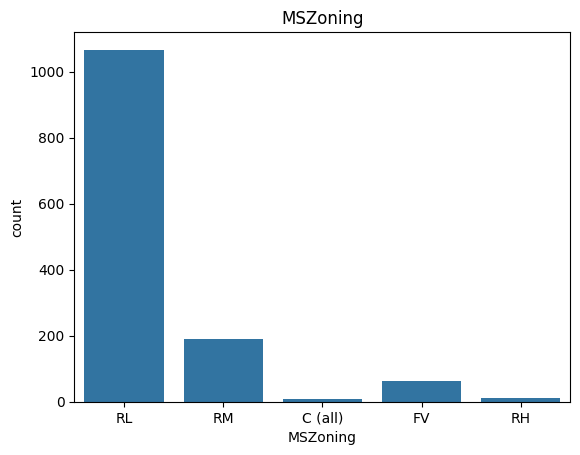

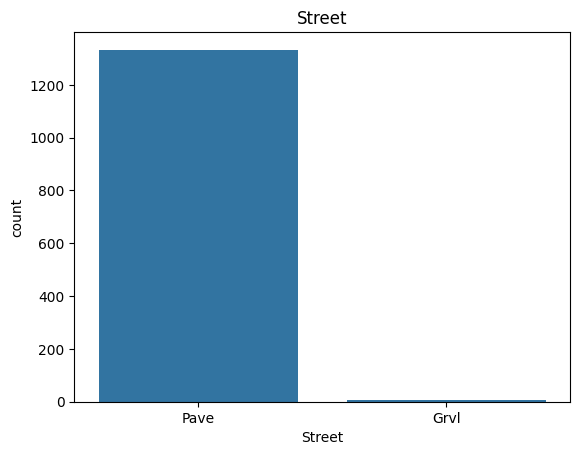

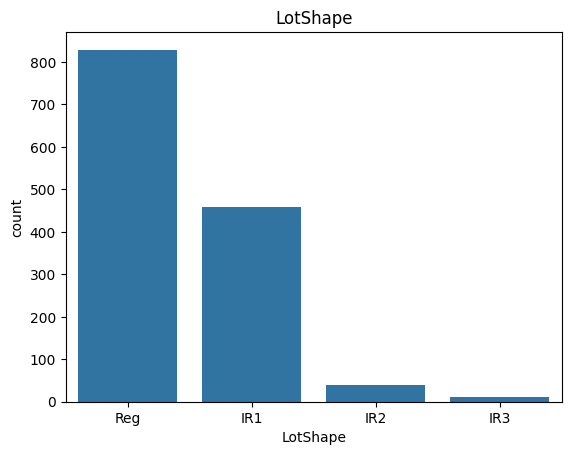

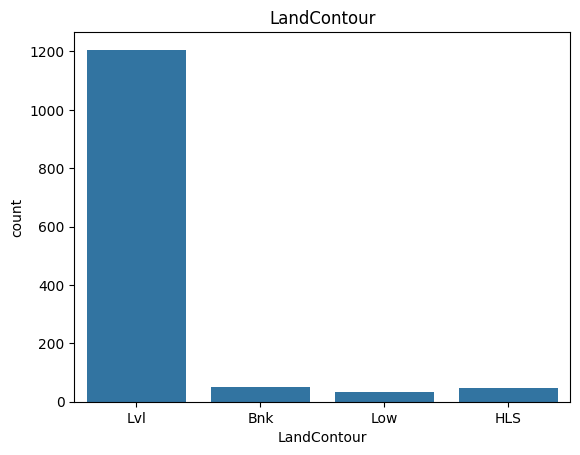

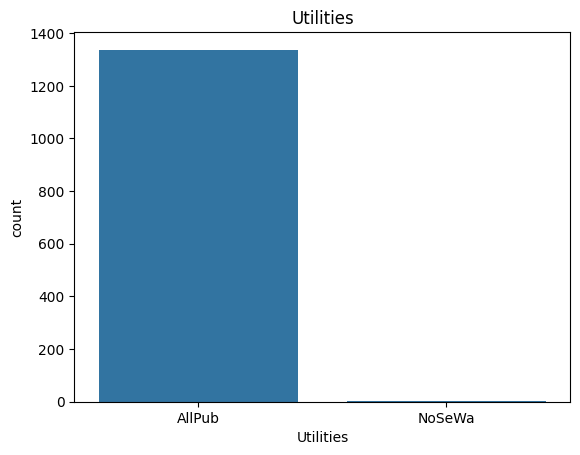

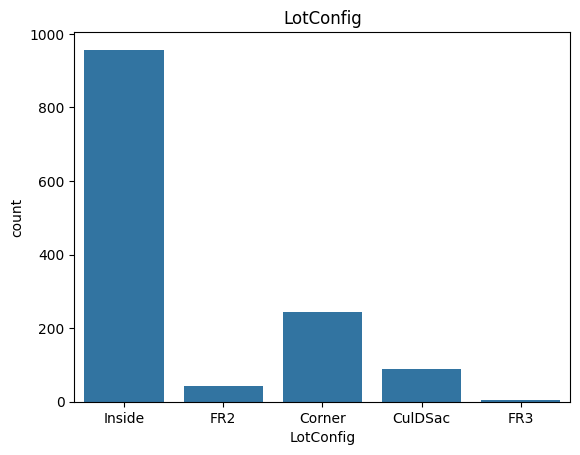

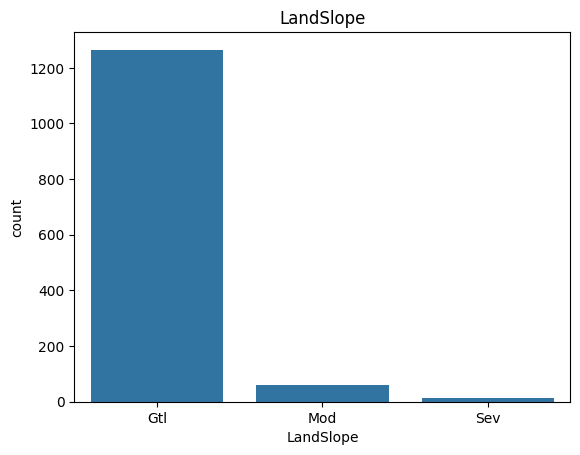

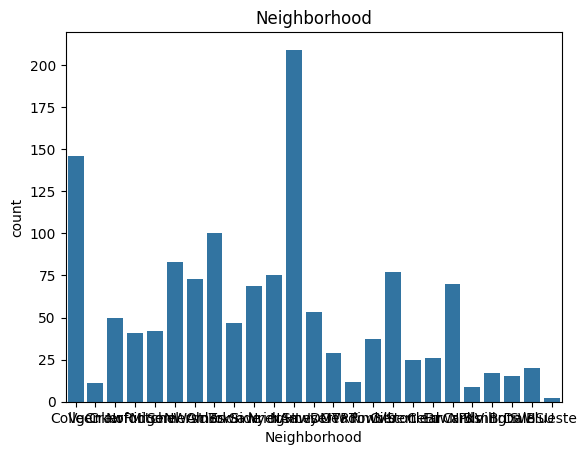

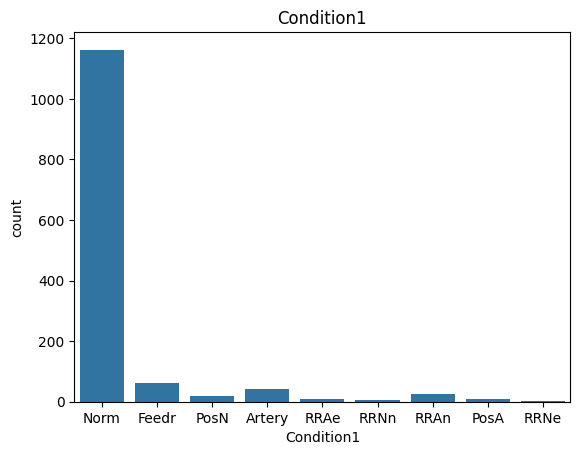

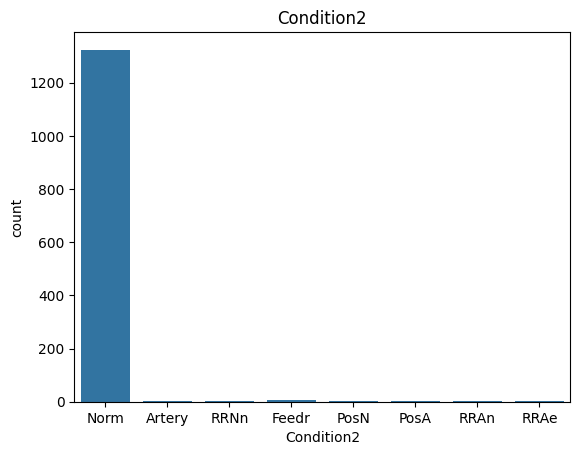

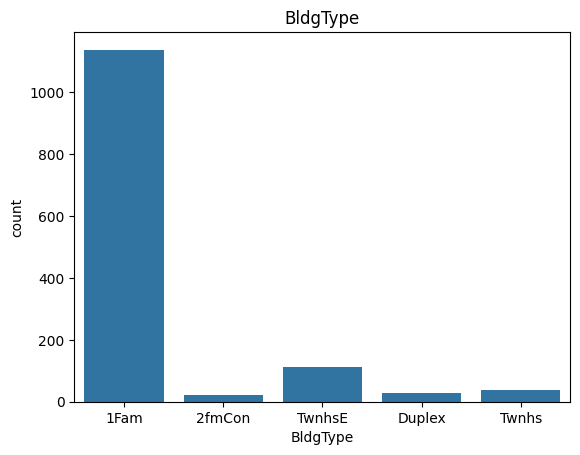

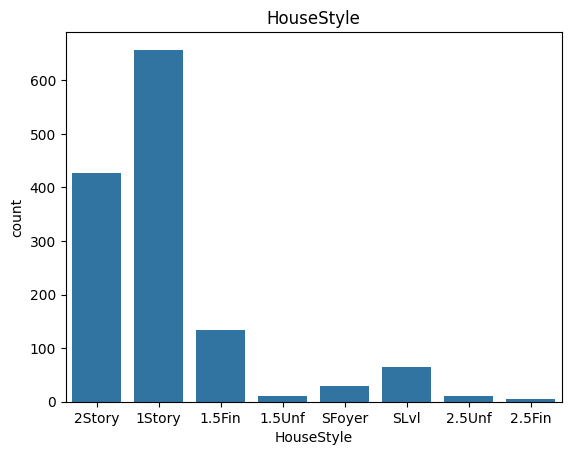

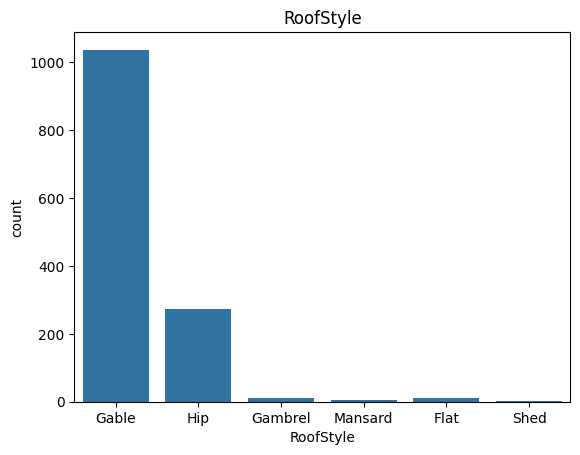

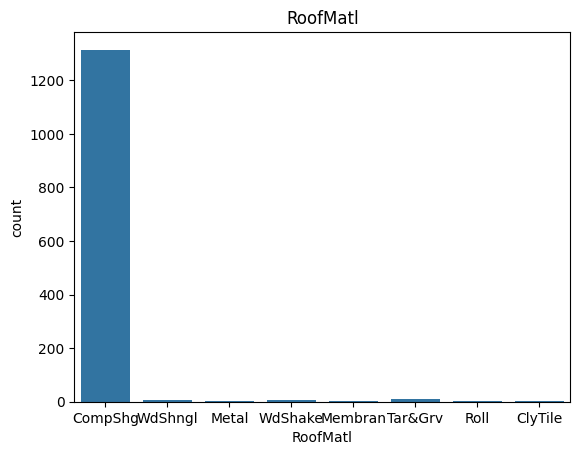

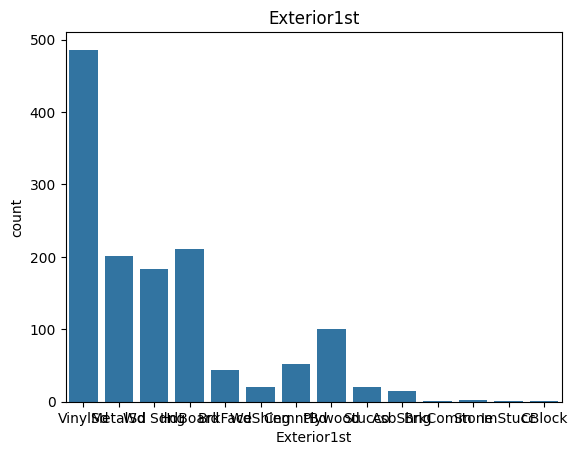

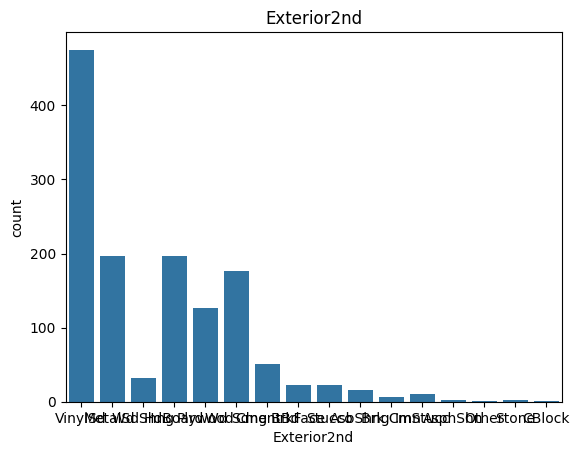

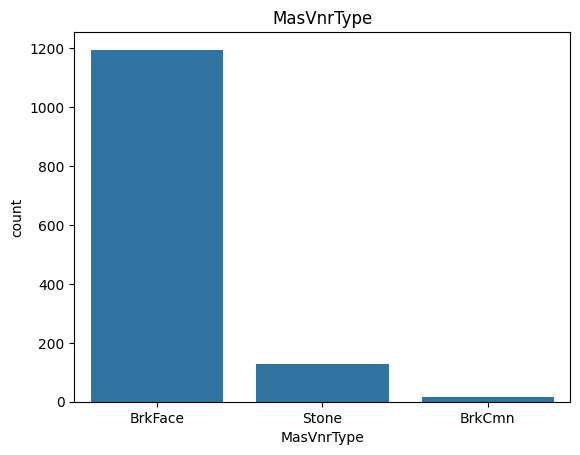

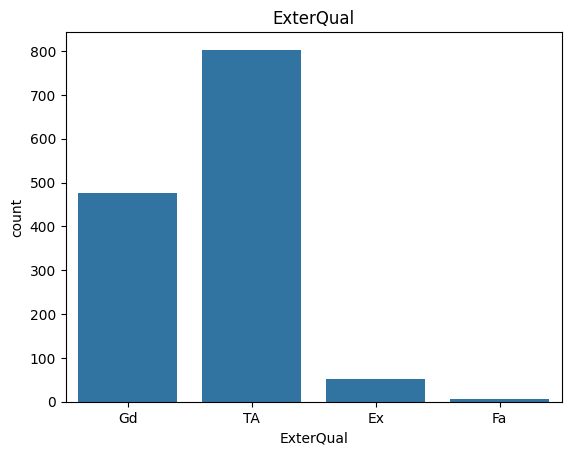

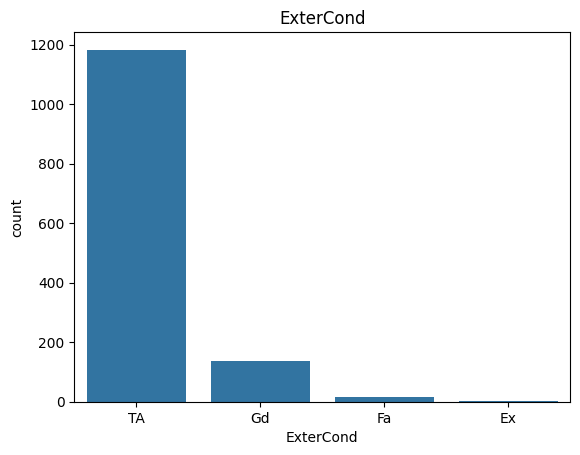

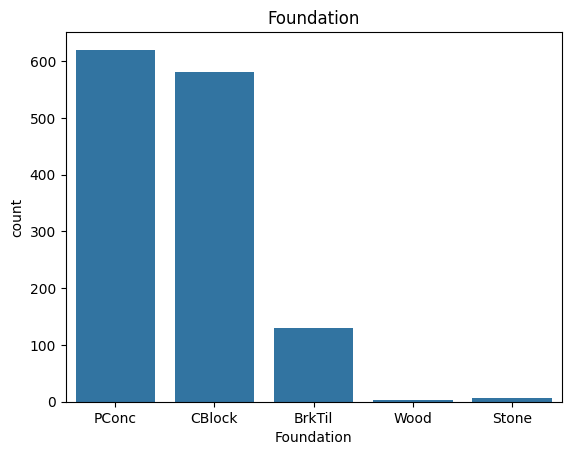

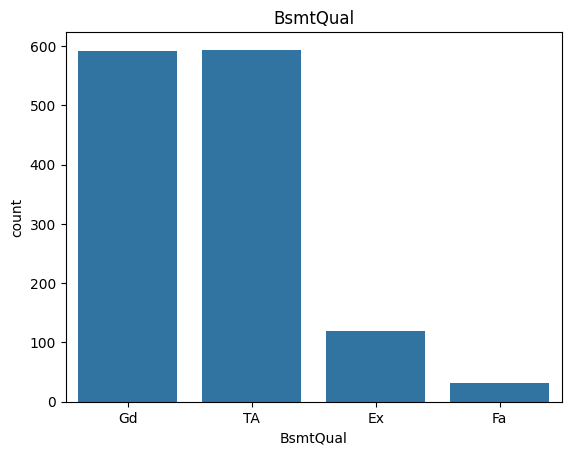

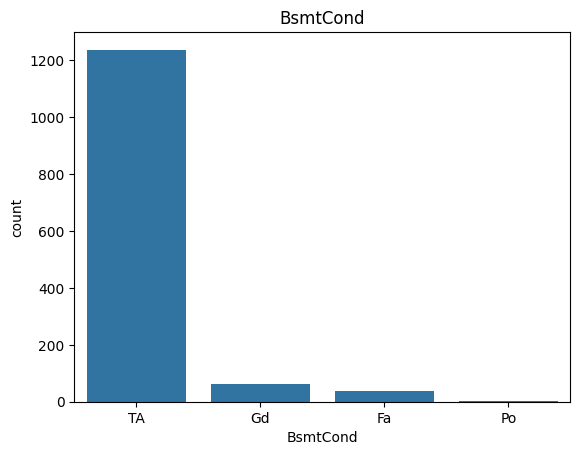

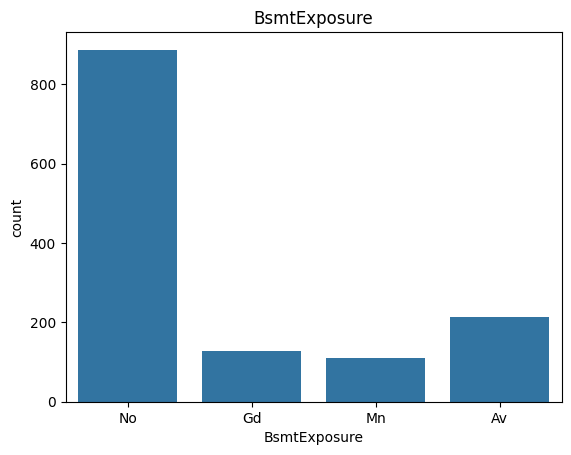

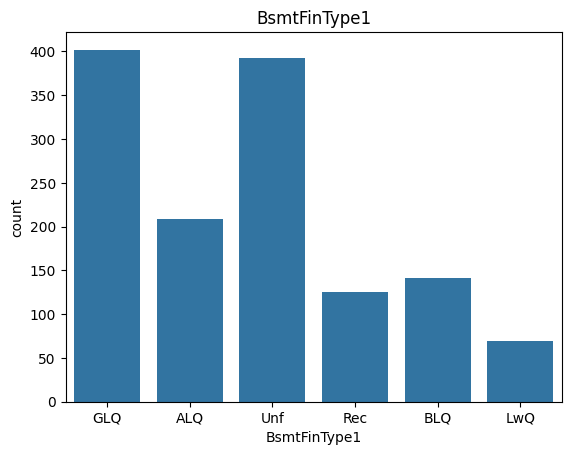

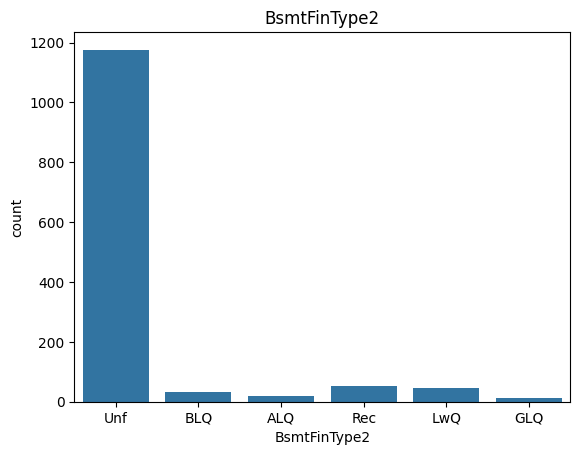

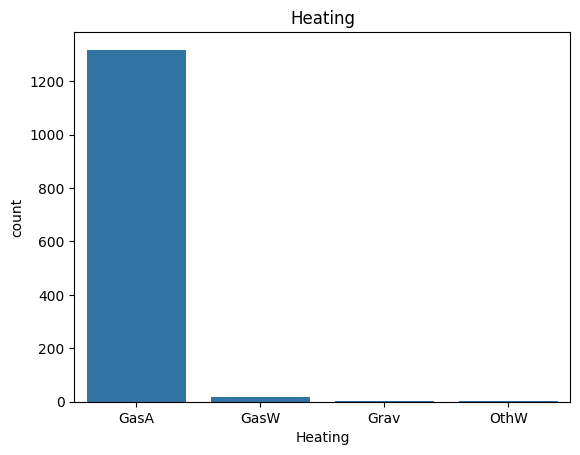

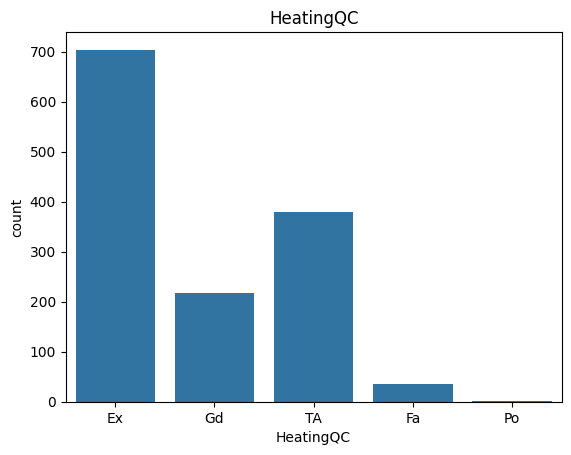

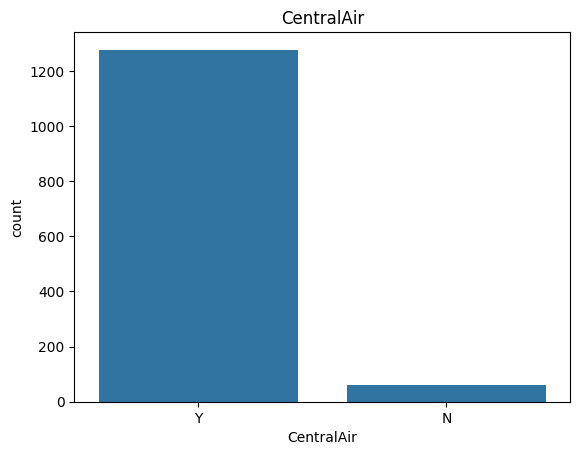

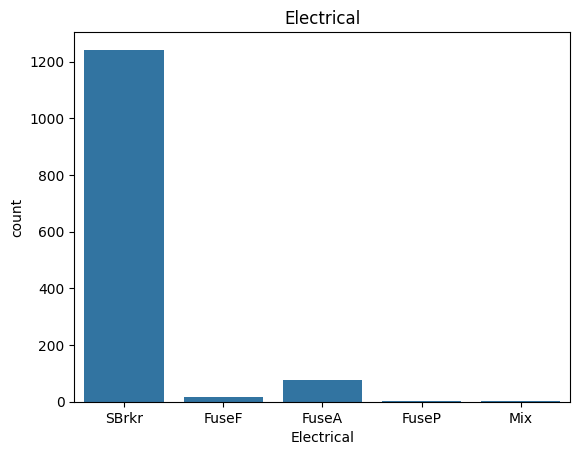

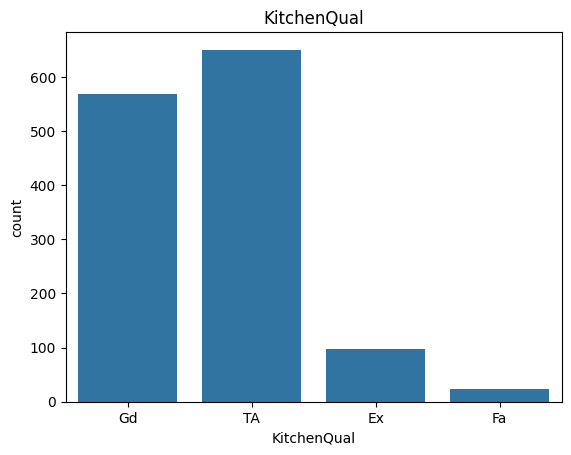

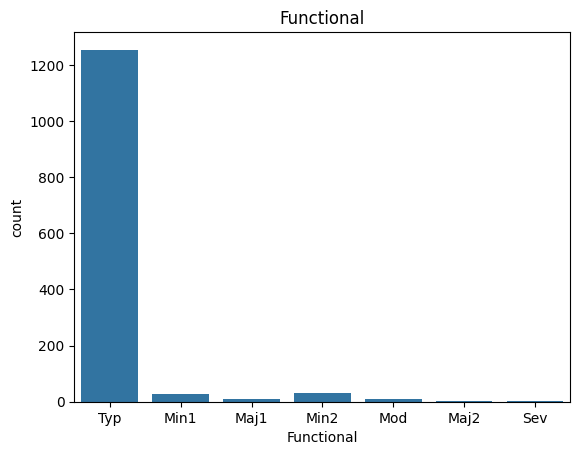

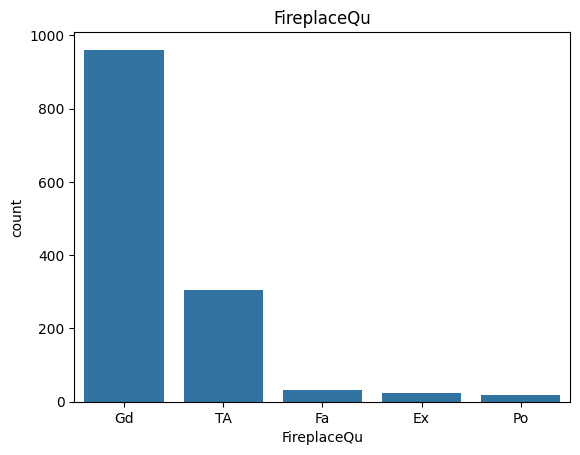

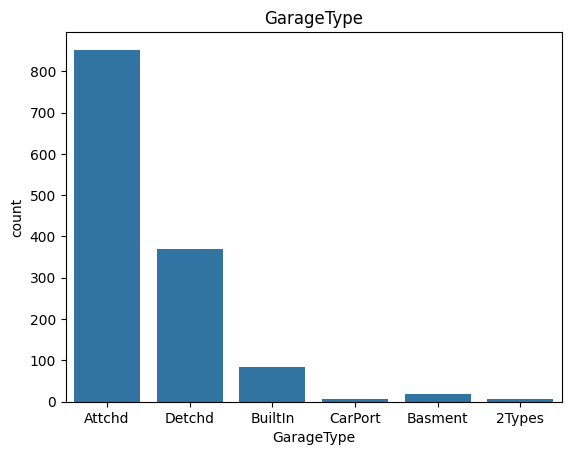

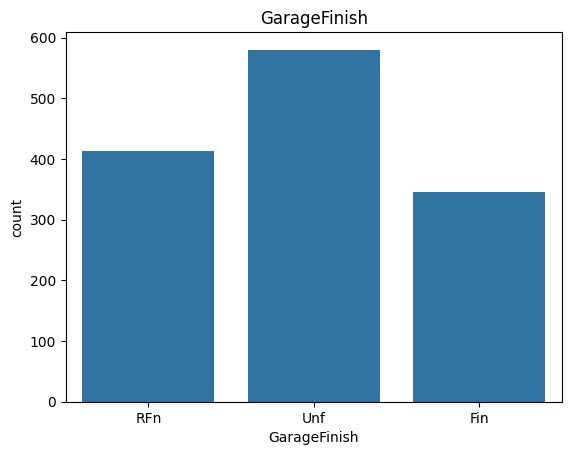

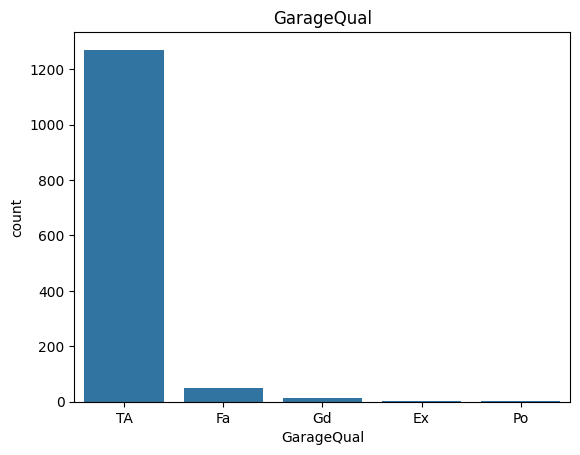

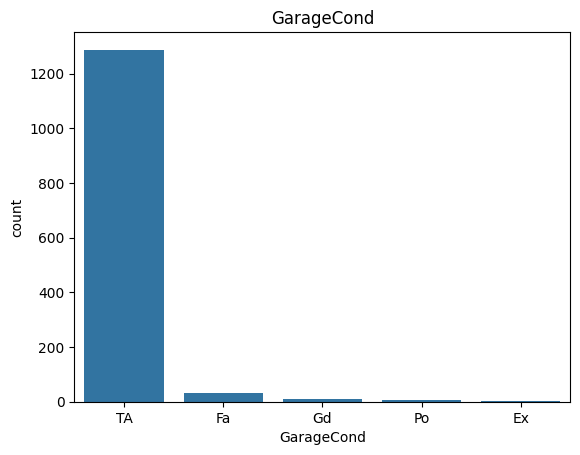

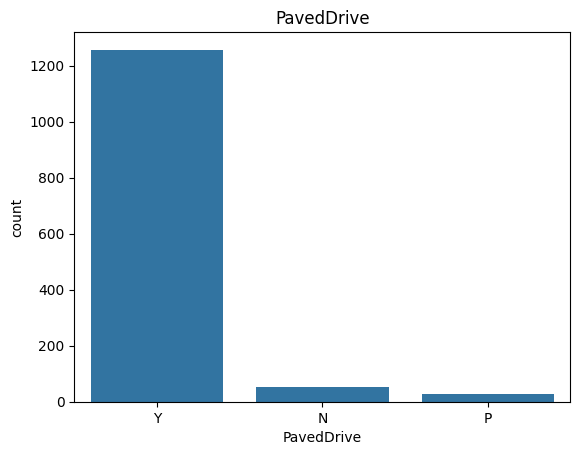

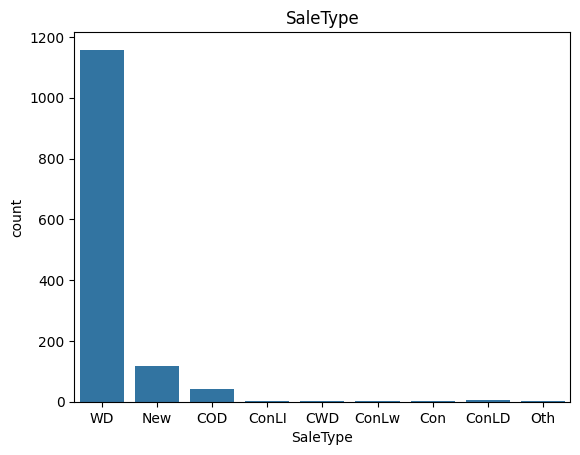

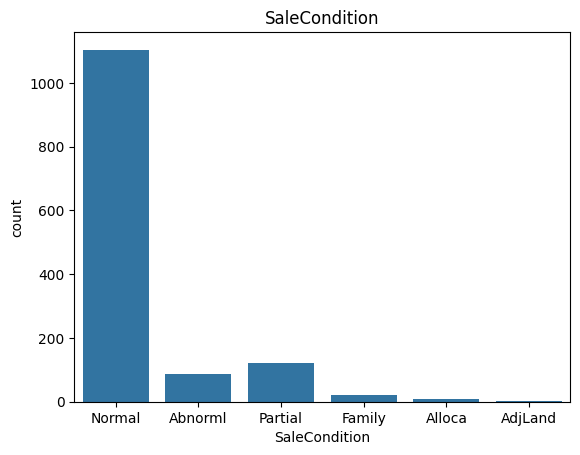

In [664]:
def fn(p):
  for i in p:
    sns.countplot(x=i,data=df)
    plt.title(i)
    plt.show()
fn(p)

In [665]:
def fn2(p):
  for i in p:
    s = df[i].value_counts()
    print(i)
    print(s)
fn2(p)

MSZoning
MSZoning
RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: count, dtype: int64
Street
Street
Pave    1333
Grvl       5
Name: count, dtype: int64
LotShape
LotShape
Reg    829
IR1    459
IR2     40
IR3     10
Name: count, dtype: int64
LandContour
LandContour
Lvl    1206
Bnk      52
HLS      48
Low      32
Name: count, dtype: int64
Utilities
Utilities
AllPub    1337
NoSeWa       1
Name: count, dtype: int64
LotConfig
LotConfig
Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: count, dtype: int64
LandSlope
LandSlope
Gtl    1265
Mod      61
Sev      12
Name: count, dtype: int64
Neighborhood
Neighborhood
NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
Mead

In [666]:
df=df.drop(['Street','Condition2','RoofStyle','Heating','Id'],axis=1)
df.shape

(1338, 72)

In [667]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotFrontage    1338 non-null   float64
 3   LotArea        1338 non-null   int64  
 4   LotShape       1338 non-null   object 
 5   LandContour    1338 non-null   object 
 6   Utilities      1338 non-null   object 
 7   LotConfig      1338 non-null   object 
 8   LandSlope      1338 non-null   object 
 9   Neighborhood   1338 non-null   object 
 10  Condition1     1338 non-null   object 
 11  BldgType       1338 non-null   object 
 12  HouseStyle     1338 non-null   object 
 13  OverallQual    1338 non-null   int64  
 14  OverallCond    1338 non-null   int64  
 15  YearBuilt      1338 non-null   int64  
 16  YearRemodAdd   1338 non-null   int64  
 17  RoofMatl       1338 non-null   object 
 18  Exterior1st  

In [668]:
int_data = df.select_dtypes(include='int64')
s = int_data.columns

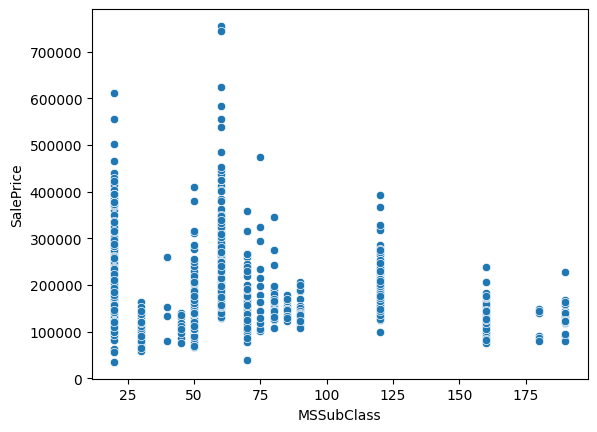

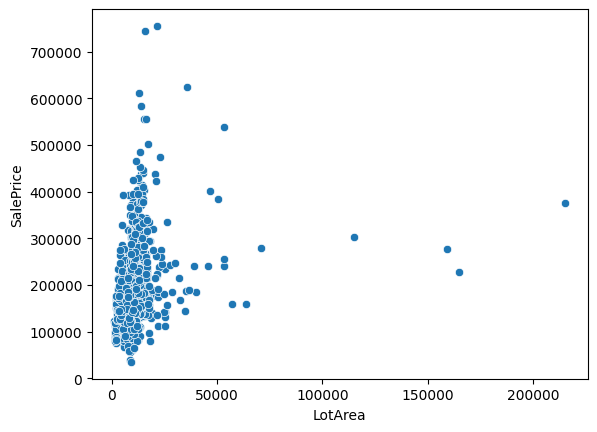

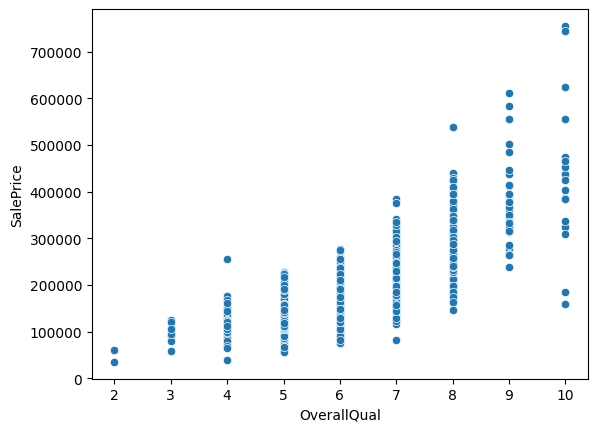

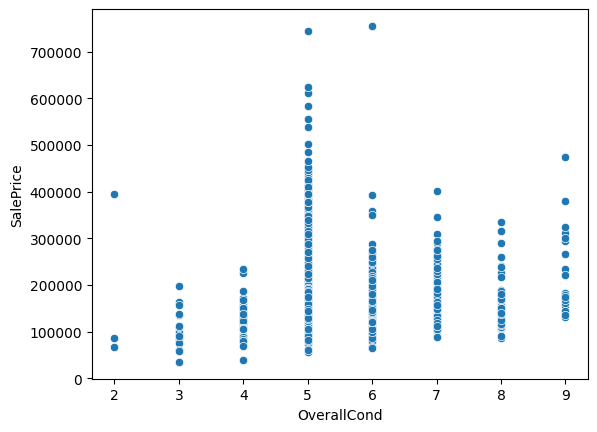

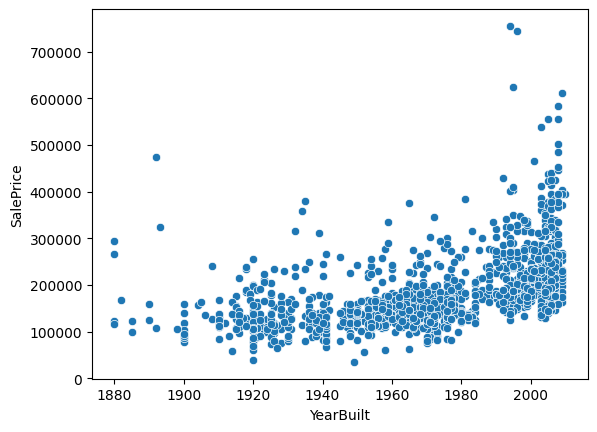

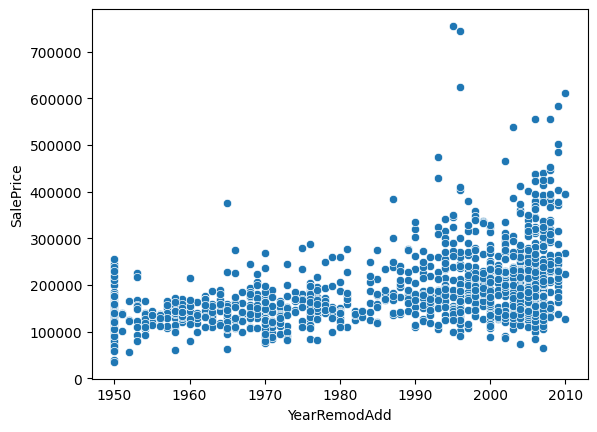

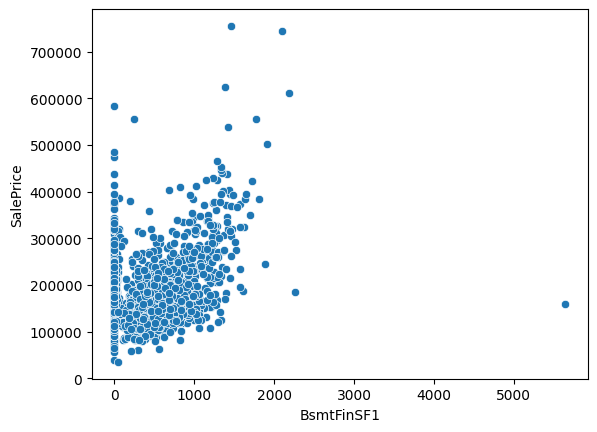

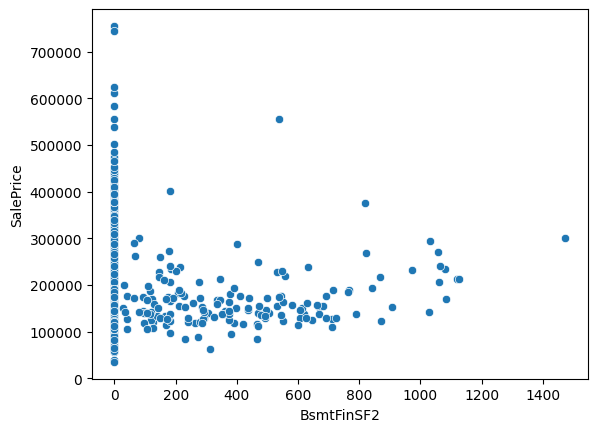

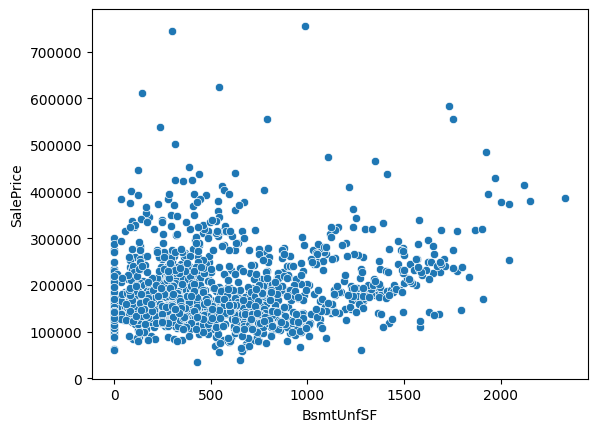

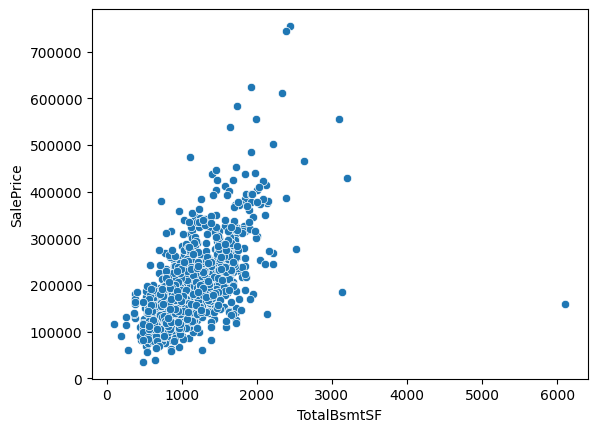

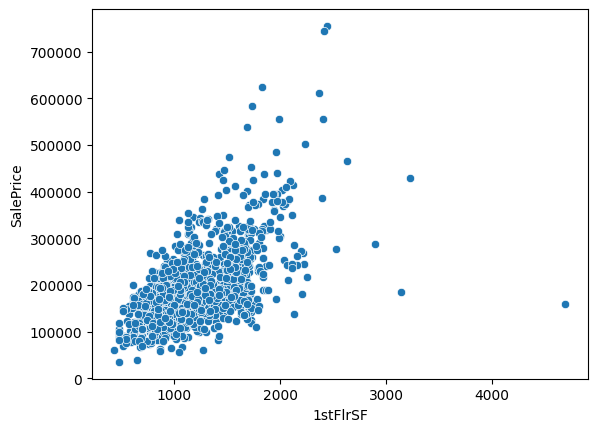

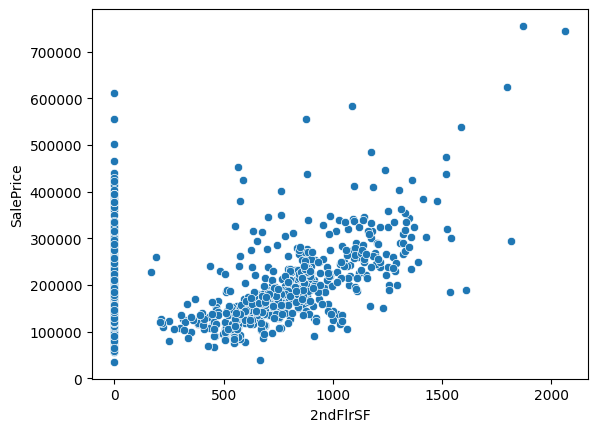

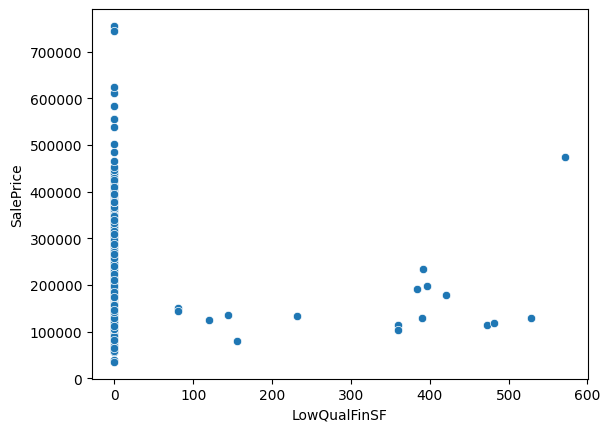

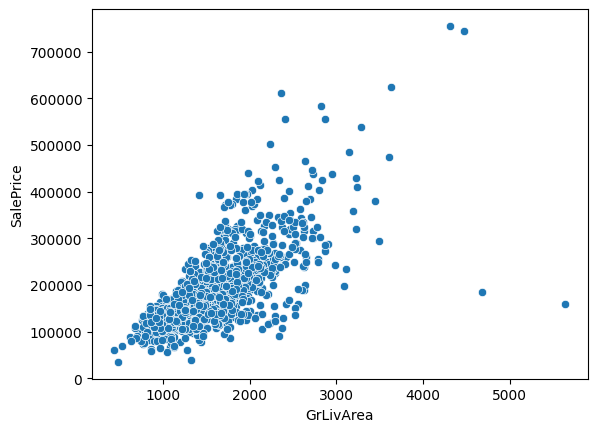

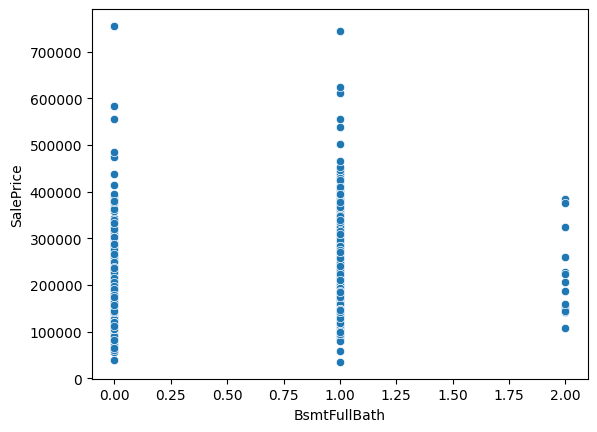

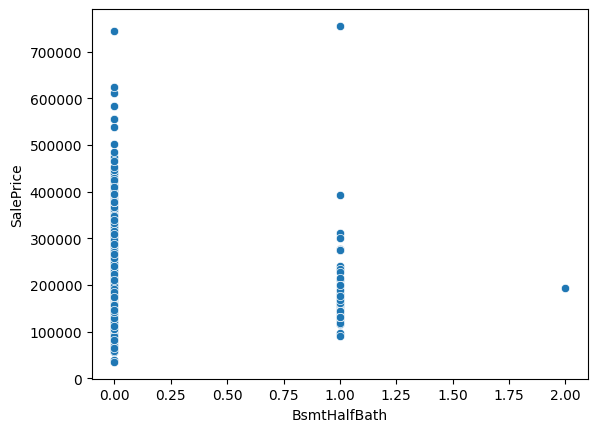

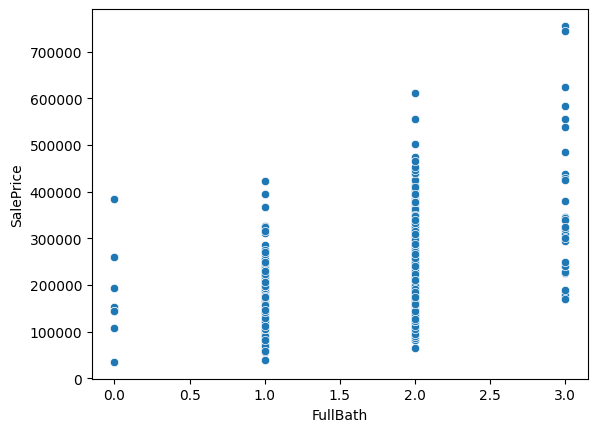

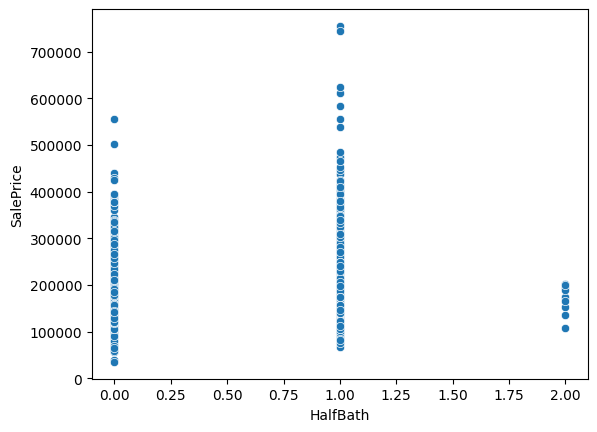

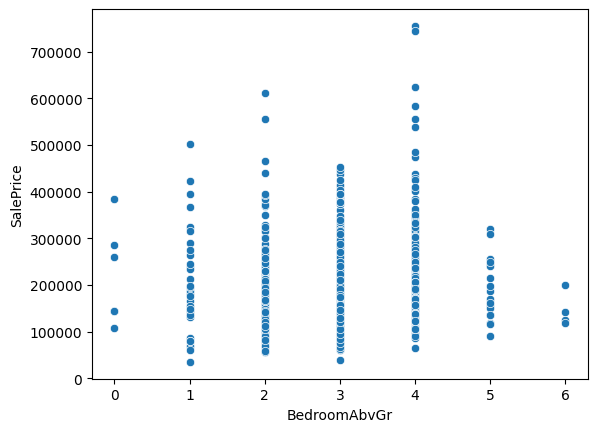

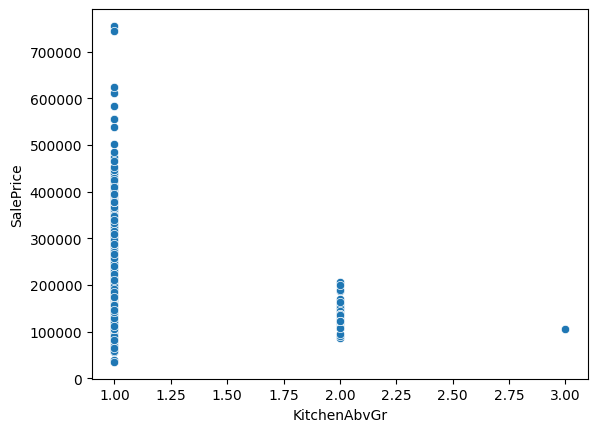

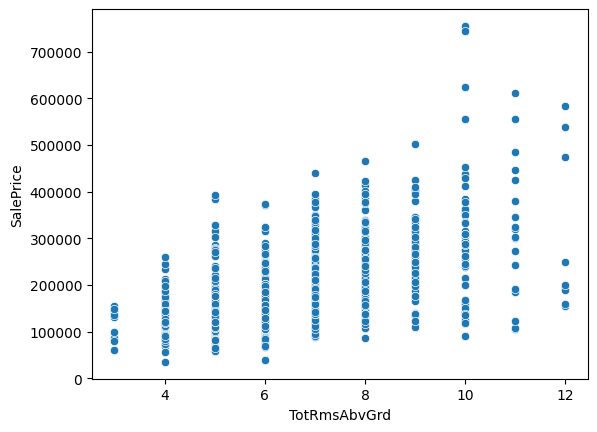

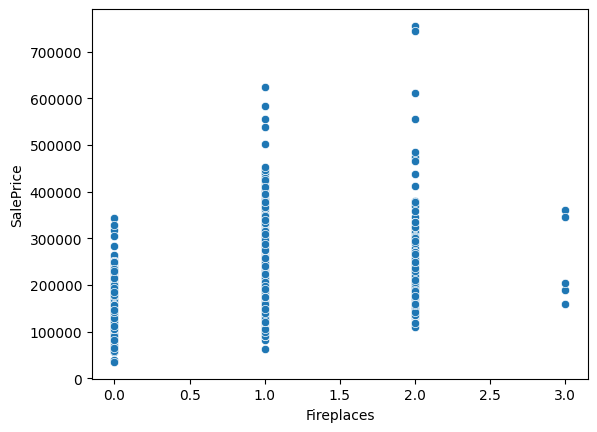

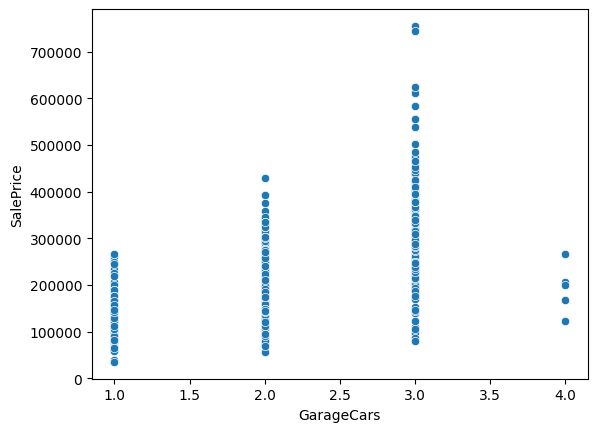

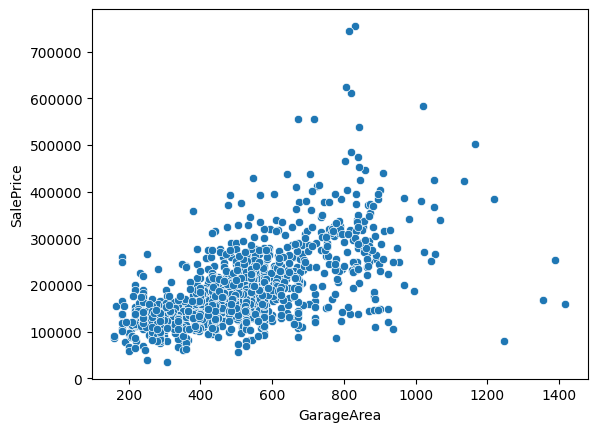

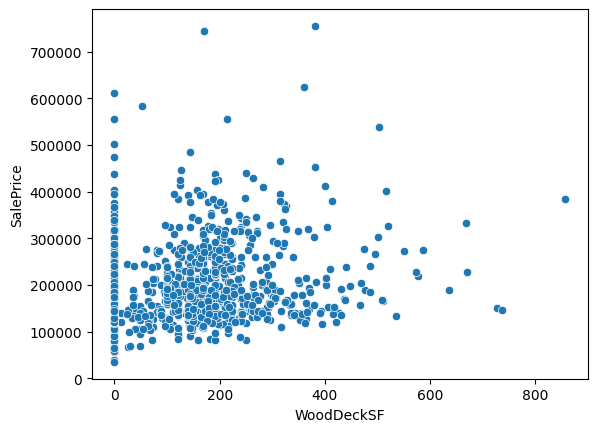

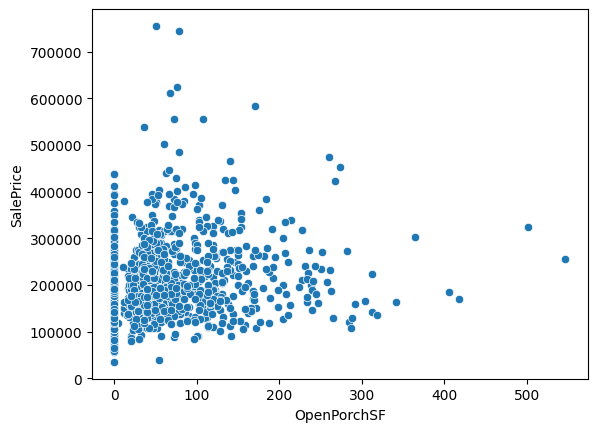

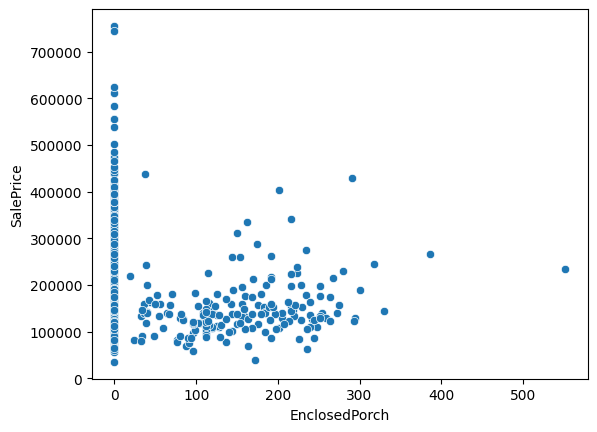

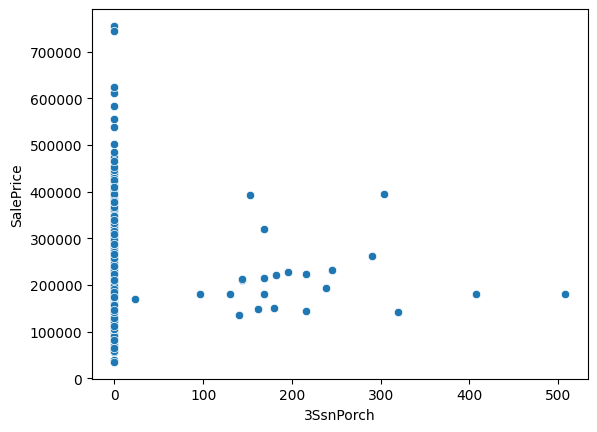

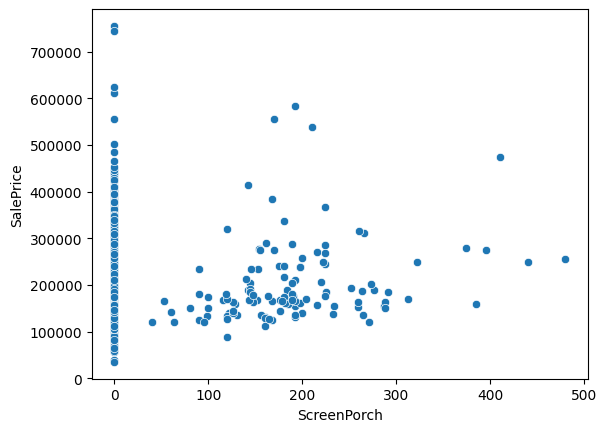

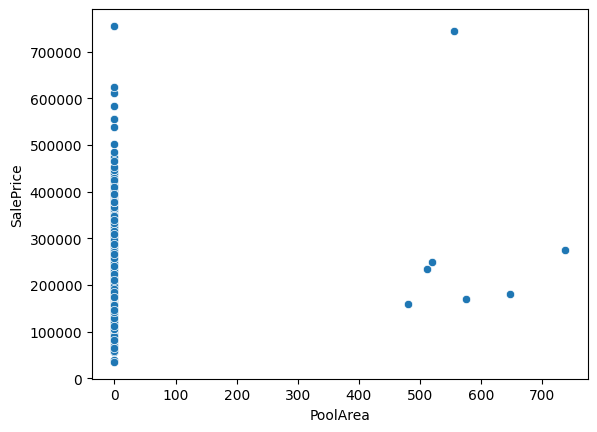

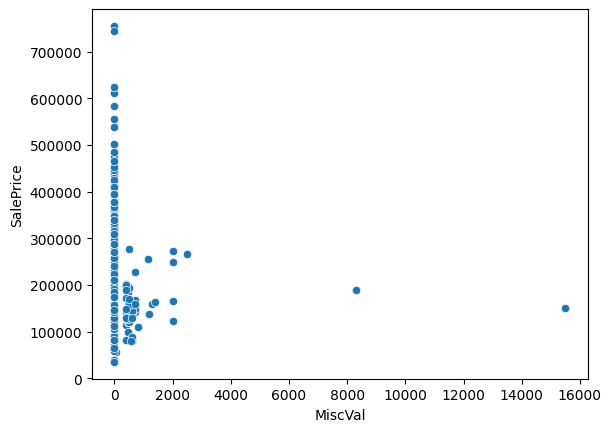

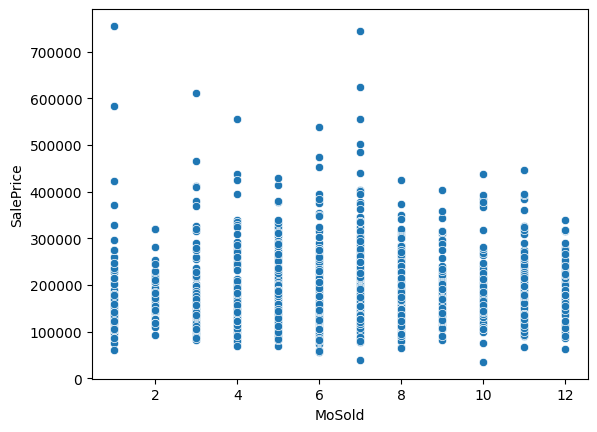

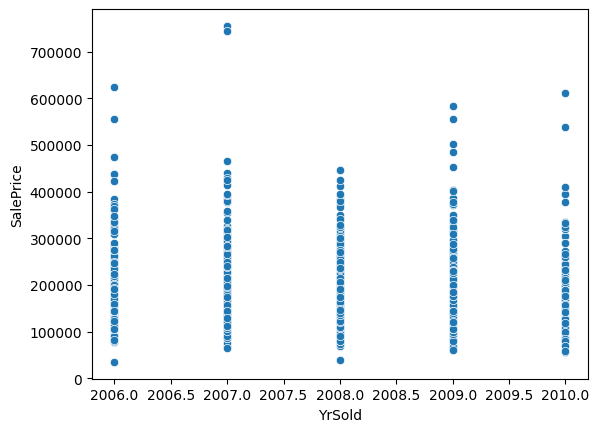

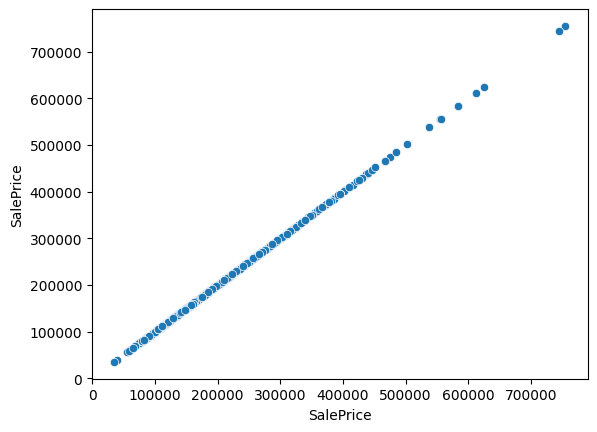

In [669]:
def fn3(s):
  for i in s:
    sns.scatterplot(x=df[i],y=df['SalePrice'])
    plt.show()
fn3(s)

Outlier Detection

In [670]:
df = df[df['LotArea']<150000]
df = df[df['BsmtFinSF1']<3000]
df = df[df['TotalBsmtSF']<4000]
df = df[df['1stFlrSF']<3500]
df = df[df['BsmtHalfBath']<1.25]
df = df[df['KitchenAbvGr']<2.25]
df = df[df['EnclosedPorch']<400]
df = df[df['MiscVal']<4000]

In [671]:
df.shape

(1329, 72)

In [672]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


Seperate Input & output

In [673]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [674]:
x

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,112,0,0,0,0,4,2010,WD,Normal


Train_Test_Split

In [675]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Seperation on basis of numeric & categorical

In [676]:
num_columns = x.select_dtypes(include=['int64', 'float64']).columns
cat_columns = x.select_dtypes(include=['object', 'category']).columns

In [677]:
cat_columns

Index(['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

Import Library

In [678]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Column_Transformer

In [679]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_data' , OneHotEncoder(handle_unknown='ignore',drop='first') , cat_columns),
        ("standardization" , StandardScaler() , num_columns)

    ],remainder='drop'
)

Fit transformer to input data

In [680]:
x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [10, 11, 15, 34] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [681]:
x_test_processed

array([[ 0.        ,  0.        ,  1.        , ..., -0.15275737,
        -0.52166752,  0.14062912],
       [ 0.        ,  0.        ,  1.        , ..., -0.15275737,
        -1.63295524, -0.61057067],
       [ 0.        ,  0.        ,  1.        , ..., -0.15275737,
        -0.15123828, -0.61057067],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.15275737,
         1.70090792,  0.89182892],
       [ 0.        ,  0.        ,  1.        , ..., -0.15275737,
        -0.89209676, -0.61057067],
       [ 0.        ,  0.        ,  1.        , ..., -0.15275737,
        -0.15123828, -1.36177046]])

# **Linear Regression**

In [682]:
model = LinearRegression()
model.fit(X_train_processed,y_train)

LinearRegression()

In [683]:
y_pred = model.predict(x_test_processed)

# **R2 Score for Linear Regression(0.8227149376218911)**

In [684]:
print(r2_score(y_pred,y_test))

0.8227149376218911


# **Ridge Regression by using GridSearchCV**

In [685]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [686]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_reg = GridSearchCV(ridge , parameters)
ridge_reg.fit(x_train_processed,y_train)

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.05792e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.32293e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [687]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 10}
0.8628454120885992


In [688]:
print(r2_score(y_test,ridge_reg.predict(x_test_processed)))

0.8800492958111971


# R2 Score for Ridge Regression(0.8800492958111971)** **

In [689]:
residuals = y_test - ridge_reg.predict(x_test_processed)


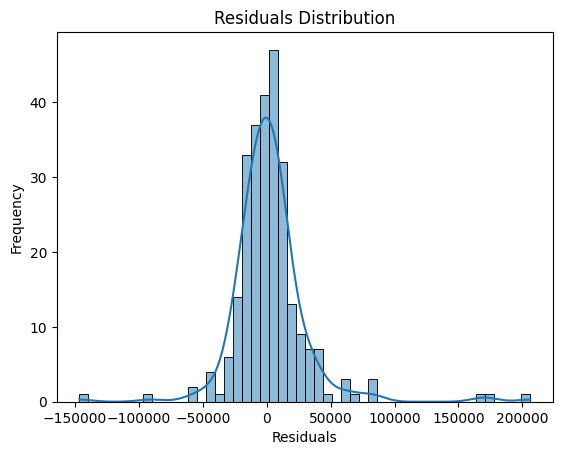

In [690]:
sns.histplot(residuals, kde=True)  # histogram + KDE
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

# **Lasso Regression by using GridSearchCV**

In [691]:
from sklearn.linear_model import Lasso

In [692]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso = Lasso()
lasso_reg = GridSearchCV(lasso,parameters)
lasso_reg.fit(x_train_processed,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.889e+11, tolerance: 5.273e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+11, tolerance: 5.155e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.706e+11, tolerance: 4.808e

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [693]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 100}
0.8611223388774485


In [694]:
print(r2_score(y_test , lasso_reg.predict(x_test_processed)))

0.8839337241343956


# **R2 Score For Lasso Regression is (0.8839337241343956)**

In [695]:
residuals = y_test - lasso_reg.predict(x_test_processed)

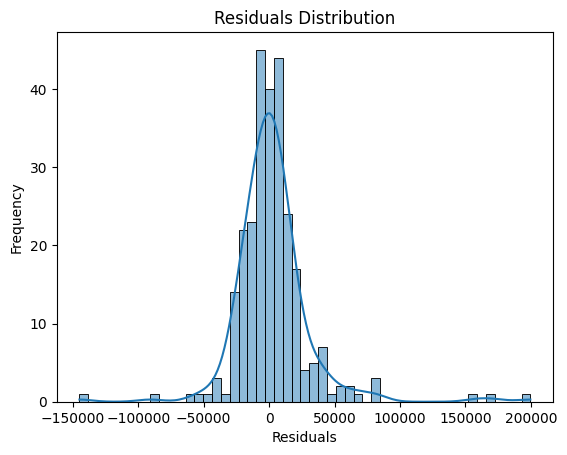

In [696]:
sns.histplot(residuals, kde=True)  # histogram + KDE
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

# ***We are getting the best R2 score with Lasso Regression***